In [26]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../../')
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [21]:
CALIBRATION_FILE = '../../../../../calibration/out/C.mat'
DATA_FILE3 = '../../../../../experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_14.35.50_trial_imudata.txt'
DATA_FILE1 = '../../../../../experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_14.09.49_trial_imudata.txt'
DATA_FILE2 = '../../../../../experiment_data/blue_feet/test_chasis_movement/14/important_experiments/2017.06.05_14.25.24_trial_imudata.txt'

In [22]:
df1 = utils.process_data_files(DATA_FILE1, CALIBRATION_FILE)
df2 = utils.process_data_files(DATA_FILE2, CALIBRATION_FILE)
df3 = utils.process_data_files(DATA_FILE3, CALIBRATION_FILE)

In [74]:
def normalize_df(df, col):
    mean = np.average(df[col])
    normalized_df = df[col] - mean
    return normalized_df

def plot_dataframes(dataframes, col='Fx', samples=-1):
    for df in dataframes:
        plt.plot(df["time"][:samples], df[col][:samples], label=col)
        plt.ylabel("Force (N)")

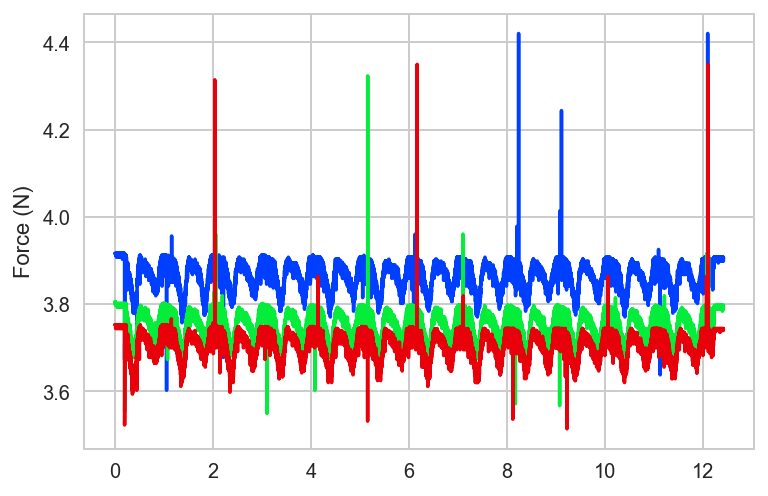

In [62]:
plot_dataframes([df1, df2, df3],col="VBatt")

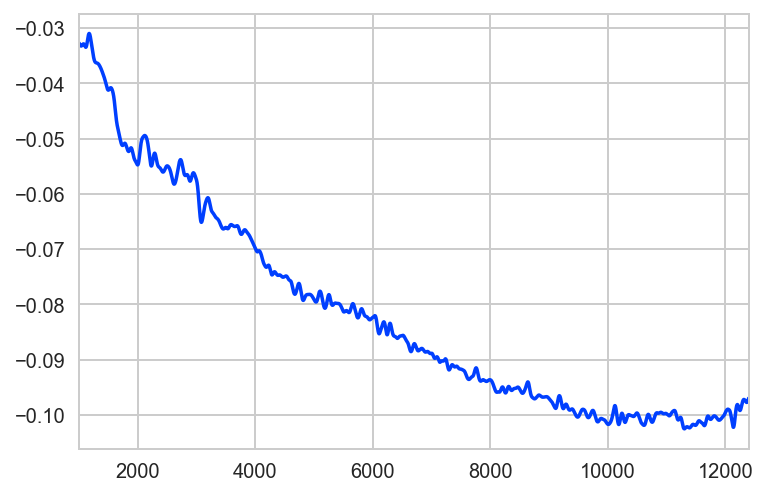

In [67]:
means1 = pd.Series.rolling(df1['Fx'], 1000).mean()[1000:]
means1.plot()

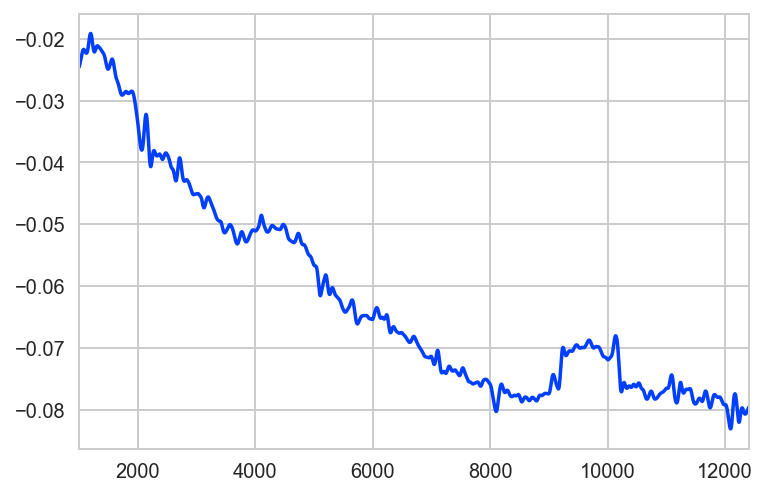

In [69]:
means2 = pd.Series.rolling(df2['Fx'], 1000).mean()[1000:]
means2.plot()

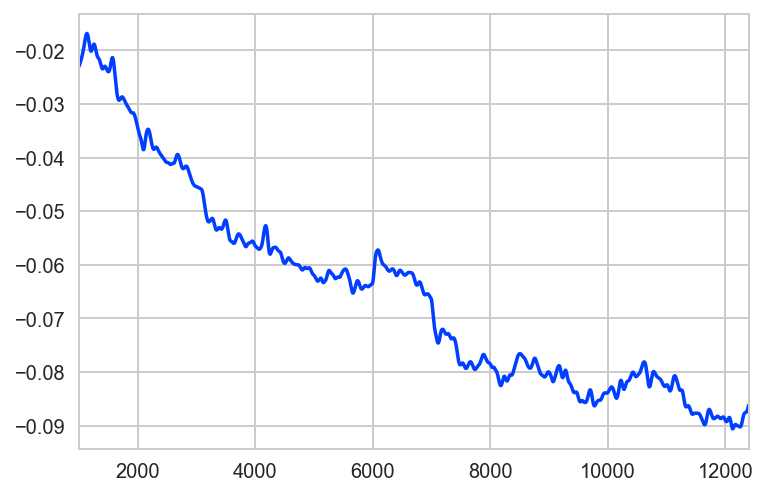

In [70]:
means3 = pd.Series.rolling(df3['Fx'], 1000).mean()[1000:]
means3.plot()

### Moving Average on Batteries

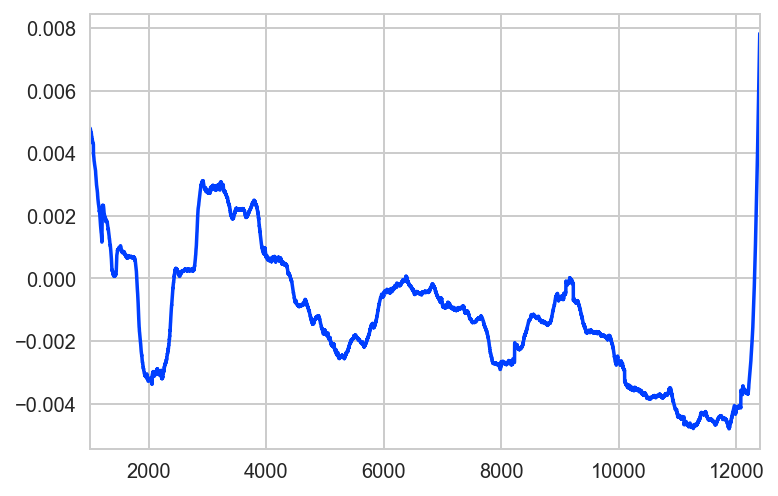

In [76]:
means1 = pd.Series.rolling(normalize_df(df1, 'VBatt'), 1000).mean()[1000:]
means1.plot()

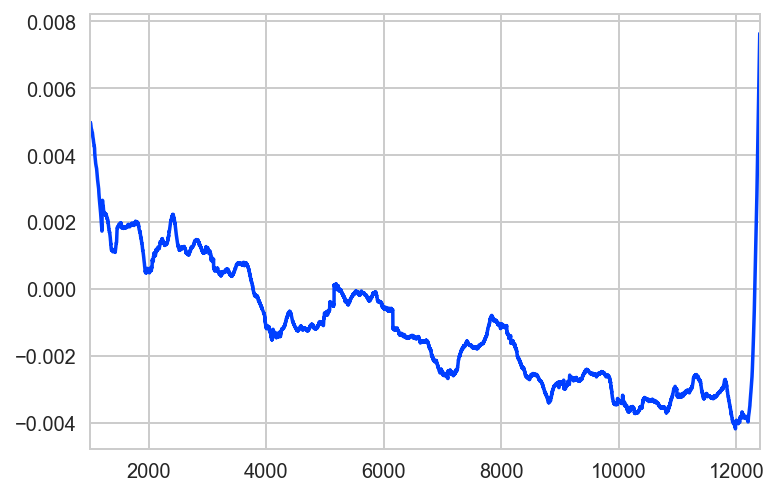

In [77]:
means2 = pd.Series.rolling(normalize_df(df2, 'VBatt'), 1000).mean()[1000:]
means2.plot()

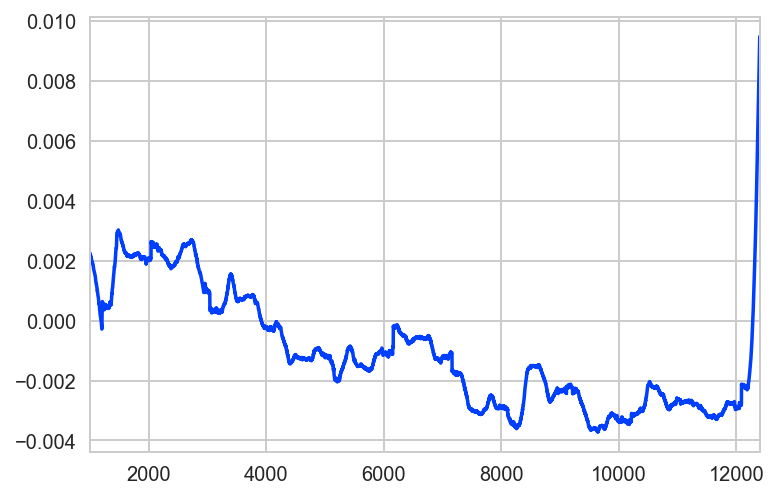

In [78]:
means3 = pd.Series.rolling(normalize_df(df3, 'VBatt'), 1000).mean()[1000:]
means3.plot()